# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm_notebook

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
try:
    df_reg_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_reg_0 = pd.read_csv('geo_data_0.csv')

try:
    df_reg_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_reg_1 = pd.read_csv('geo_data_1.csv')

try:
    df_reg_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_reg_2 = pd.read_csv('geo_data_2.csv')

### Регион 0

In [3]:
df_reg_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_reg_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_reg_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


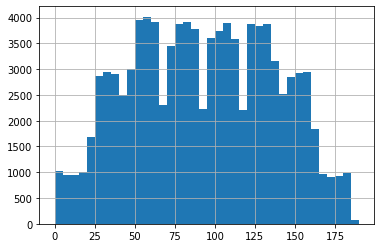

In [6]:
df_reg_0['product'].hist(bins=np.arange(0, 192, 5));

### Регион 1

In [7]:
df_reg_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df_reg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_reg_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


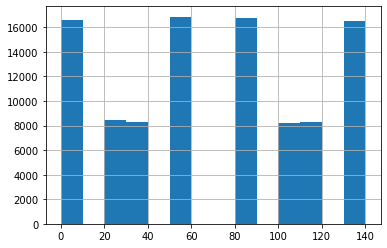

In [10]:
df_reg_1['product'].hist(bins=np.arange(0, 142, 10));

### Регион 2

In [11]:
df_reg_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
df_reg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df_reg_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


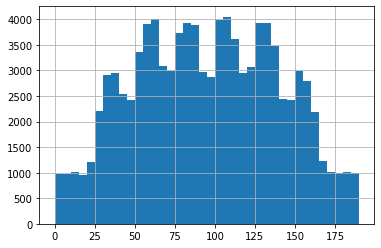

In [14]:
df_reg_2['product'].hist(bins=np.arange(0,192,5));

### Вывод
- файлы открыты и проанализированы,
- в данных отсутствуют пропуски,
- данные не нуждаются в дополнительной обработке,
- из-за отсутвия дополнительных данных, описывающих, что из себя представляют столбцы, детальный анализ данных невозможен.

## Обучение и проверка модели

### Разбивка на выборки

In [15]:
def get_features_valid(df):
    """функция разбивает датасет на выборки признаков и целевого признака"""
    features = df[['f0', 'f1', 'f2']]
    target = df['product']

    print(features.shape)
    print(target.shape)
    
    return features, target

Разобьем датасет по каждому региону

In [16]:
features_0, target_0 = get_features_valid(df_reg_0)
features_1, target_1 = get_features_valid(df_reg_1)
features_2, target_2 = get_features_valid(df_reg_2)

(100000, 3)
(100000,)
(100000, 3)
(100000,)
(100000, 3)
(100000,)


In [17]:
state = np.random.RandomState(12345)

In [18]:
def get_split(features, target):
    """функция разбивает выборки на обучающие и валидацтонные выборки"""
    train_features, valid_features, train_target, valid_target = train_test_split(
    features,
    target, 
    test_size=0.25,
    random_state=12345
    # random_state=state
    )
    #сбрасываем индексы
    valid_target = valid_target.reset_index()
    valid_target = valid_target['product']

    print('признаки')
    print(train_features.shape)
    print(valid_features.shape)

    print('целевые признаки')
    print(train_target.shape)
    print(valid_target.shape)

    print('==================')

    return train_features, valid_features, train_target, valid_target

Получим валидационные и обучающие выборки по каждому региону

In [19]:
train_features_0, valid_features_0, train_target_0, valid_target_0 = get_split(features_0, target_0)
train_features_1, valid_features_1, train_target_1, valid_target_1 = get_split(features_1, target_1)
train_features_2, valid_features_2, train_target_2, valid_target_2 = get_split(features_2, target_2)

признаки
(75000, 3)
(25000, 3)
целевые признаки
(75000,)
(25000,)
признаки
(75000, 3)
(25000, 3)
целевые признаки
(75000,)
(25000,)
признаки
(75000, 3)
(25000, 3)
целевые признаки
(75000,)
(25000,)


### Обучение моделей

In [20]:
def get_predict (train_features, valid_features, train_target, valid_target):
    """функция обучает модель, возвращает предсказания и выводит на экран значения RMSE """
    model = LinearRegression(n_jobs=-1)
    model.fit(train_features, train_target)

    prediction = model.predict(valid_features)
    # переводим предсказания в сериес
    prediction = pd.Series(prediction)

    mse = MSE(valid_target, prediction)
    rmse = mse**0.5

    print(
        f"RMSE = {round(rmse,2)}\nсредний запас предсказанного сырья = {round(prediction.mean(),2)}"
    )
    print('=================')
    return prediction

Получим предсказания по регионам

In [21]:
prediction_0 = get_predict(train_features_0, valid_features_0, train_target_0, valid_target_0)
prediction_1 = get_predict(train_features_1, valid_features_1, train_target_1, valid_target_1)
prediction_2 = get_predict(train_features_2, valid_features_2, train_target_2, valid_target_2)

RMSE = 37.58
средний запас предсказанного сырья = 92.59
RMSE = 0.89
средний запас предсказанного сырья = 68.73
RMSE = 40.03
средний запас предсказанного сырья = 94.97


### Вывод
- Средний запас сырья больше в регионе 0 и 2 выше, однако, значение RMSE высокое. Это свидетельствует о неоднозначности показателей, неточности модели регрессии.
- Средние запасы сырья региона 1 меньше. Значение RMSE низкое, что говорит о более высоком качестве моделей.

## Подготовка к расчёту прибыли

Бюджет будет полностью освоен при условии: бюджет = кол-во скважин * кол-во топлива * прибыль. Отсюда среднее кол-во сырья на одной скважине равно:

$\frac{бюджет}{скважины \star прибыль}$

In [22]:
# бюджет на разработку 10 млдр
BUDGET = 10*1e+9

# разведка
WELL_DEVELOPMENT = 500

# лучшие скважины
TOP_WELL = 200

# прибыль с 1 ед. топлива 450 т.р.
PROFIT_FUEL = 450*1e+3

# минимальное кол-во топливо для выхода в 0
AVERAGE_FUEL = BUDGET / (TOP_WELL * PROFIT_FUEL)

AVERAGE_FUEL

111.11111111111111

### Вывод
Среднее количество топлива на одной скажины, необходимое для полного освоения бюджета (выход в 0) - 111 т.баррелей. Это больше чем средний запас **предсказанного сырья по валидационной выборке** по регионам.

## Расчёт прибыли и рисков 

In [23]:
def get_profit(predict, valid, count):
    """функция берет значение самых богатых скважин и высчитывает прибыль"""
    #сортируем по возрастанию
    predict_sort = predict.sort_values(ascending=False)

    # отбираем из валид.выборки по индексам отсортированного предсказания и берем count скважин
    valid_sort = valid[predict_sort.index][:count]
    
    # общее кол-во топлива
    total_fuel = valid_sort.sum()
    
    # считаем прибиль: запасы топлива всех скважин * прибыль с топлива - бюджет
    profit = total_fuel * PROFIT_FUEL - BUDGET
 
    return profit

In [24]:
def get_top_fuel(predict, valid, count):
    #сортируем по возрастанию
    predict_sort = predict.sort_values(ascending=False)

    # отбираем из валид.выборки по индексам отсортированного предсказания и берем count скважин
    valid_sort = valid[predict_sort.index][:count]
    
    # общее кол-во топлива
    total_fuel = valid_sort.sum()
 
    return total_fuel

Расчитаем прибыль с 200 лучших скважин по каждому региону и общее кол-во топлива

In [25]:
print('======общая прибыль с лучших скважин по регионам=======')
print(round(get_profit(prediction_0, valid_target_0, TOP_WELL)/1e+6), 'млн.')
print(round(get_profit(prediction_1, valid_target_1, TOP_WELL)/1e+6), 'млн.')
print(round(get_profit(prediction_2, valid_target_2, TOP_WELL)/1e+6), 'млн.')
print('======общее кол-во топлива с лучших скважин по регионам=======')

print(round(get_top_fuel(prediction_0, valid_target_0, TOP_WELL)))
print(round(get_top_fuel(prediction_1, valid_target_1, TOP_WELL)))
print(round(get_top_fuel(prediction_2, valid_target_2, TOP_WELL)))

======общая прибыль с лучших скважин по регионам=======
3321 млн.
2415 млн.
2710 млн.
======общее кол-во топлива с лучших скважин по регионам=======
29602
27589
28245


Общее кол-во топлива с 200 лучших скважин, превышает среднее минимальное значение топлива, необходимое для полного освоения бюджета(выход в 0)

In [26]:
def boot_fuel(predict, valid, repeat):
    """функция с помощью техники бутстреп отбирает средние значения из лучших скважин из случайных"""
    values = []
    alpha = 0.05

    # бутстреп
    for _ in tqdm_notebook(range(repeat)):
        predict_sample = predict.sample(n=WELL_DEVELOPMENT, random_state=state, replace=True)
        valid_sample = valid[predict_sample.index]
        # расчет прибыли
        result = get_profit(predict_sample, valid_sample, TOP_WELL)
        values.append(result)

    values = pd.Series(values)

    # доверительный интервал в 95%
    lower = round( values.quantile(alpha/2) / 1e+6 ) # 2.5% снизу
    upper = round( values.quantile(1-alpha/2) / 1e+6 ) # 2,5% сверху

    #считаем шанс получить отрицательную прибыль 
    risk = (values < 0).sum() / repeat * 100

    print(
        f'Средняя прибыль: {round(values.mean()/1e+6)} млн.\n95% интервал:{(lower, upper,)} млн.\nриск убытков:{round(risk,2)}%'
    )

Посчитаем с помощью техники бутстреп среднее значение прибыли со скважин, доверительный интервал и риск убытков.

In [27]:
boot_fuel(prediction_0, valid_target_0, 1000)
boot_fuel(prediction_1, valid_target_1, 1000)
boot_fuel(prediction_2, valid_target_2, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль: 426 млн.
95% интервал:(-102, 948) млн.
риск убытков:6.0%


  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль: 518 млн.
95% интервал:(128, 954) млн.
риск убытков:0.3%


  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль: 420 млн.
95% интервал:(-116, 990) млн.
риск убытков:6.2%


### Вывод
Рекомендуемый регион для разработки - регион 1:
- модель обученная на данных региона - самая качественная
- низкий уровень риска при разработке месторождений
- самая высокая средняя прибыль
- 95% интервал прибыли не имеет отрицательных значений

## ВЫВОД

- обучены и проверены модели для каждого региона,
- произведена подготовка прибыли,
- написаны функции для расчёта прибыли по выбранным скважинам и предсказаниям модели,
- подсчитаны риски и прибыли для каждого региона
- в каждом пункте сделаны краткие выводы.